In [42]:
import anndata
import umap
import xgboost
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import pickle
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML

genes = ["CTNNB1", "JUND", "CD320", "CTNNB1", "IFI6"]
levels = ["0", "0.5", "1.0"]
data_dir = "/data/scgpt_perturbation_colon_epithel2/perturbations"
file_pattern = data_dir + "/perturbation_experiment_{gene}_level_{level}"
base_fname = file_pattern.format(gene = "JUND", level = "1.0")
if not 'adata' in globals():
    adata = anndata.read_h5ad(f"{base_fname}.h5ad")
    base_df = adata.obs[["tissue", "cell_type", "disease"]].copy()
base_df.head()

,tissue,cell_type,disease,umap_x,umap_y
cell_id,,,,,
N105446_L-ATTGTTCCAAACGTGG,lamina propria of mucosa of colon,paneth cell,Crohn disease,8.859280,6.109337
N105446_L-TCGACGGGTGAGACCA,lamina propria of mucosa of colon,paneth cell,Crohn disease,8.500531,5.723216
N105446_L-AGTAACCGTTAAGGGC,lamina propria of mucosa of colon,paneth cell,Crohn disease,7.826432,5.843547
N105446_L-GCAGGCTTCGCTAAAC,lamina propria of mucosa of colon,goblet cell,Crohn disease,12.415438,6.049243
N105446_L-ATCTTCATCTGAGAGG,lamina propria of mucosa of colon,goblet cell,Crohn disease,12.392947,6.155272


In [43]:
umap_model_file = "/scratch/umap_model_trained1.pickle"
if not "umap_model" in globals():
    try:
        with open(umap_model_file, "rb") as f:
            umap_model = pickle.load(f)
            print("loaded")
    except:
        base_embeddings = np.load(f"{base_fname}.embeddings.npy")
        umap_model = umap.UMAP(random_state=42).fit(base_embeddings)
        with open(umap_model_file, "wb") as f:
            pickle.dump(umap_model, f)
            print("saved")
umap_model

UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [44]:
if not "umap_x" in base_df.columns:
    base_embeddings = np.load(f"{base_fname}.embeddings.npy")
    base_df[["umap_x", "umap_y"]] = umap_model.transform(base_embeddings)
base_df.head()

,tissue,cell_type,disease,umap_x,umap_y
cell_id,,,,,
N105446_L-ATTGTTCCAAACGTGG,lamina propria of mucosa of colon,paneth cell,Crohn disease,8.859280,6.109337
N105446_L-TCGACGGGTGAGACCA,lamina propria of mucosa of colon,paneth cell,Crohn disease,8.500531,5.723216
N105446_L-AGTAACCGTTAAGGGC,lamina propria of mucosa of colon,paneth cell,Crohn disease,7.826432,5.843547
N105446_L-GCAGGCTTCGCTAAAC,lamina propria of mucosa of colon,goblet cell,Crohn disease,12.415438,6.049243
N105446_L-ATCTTCATCTGAGAGG,lamina propria of mucosa of colon,goblet cell,Crohn disease,12.392947,6.155272


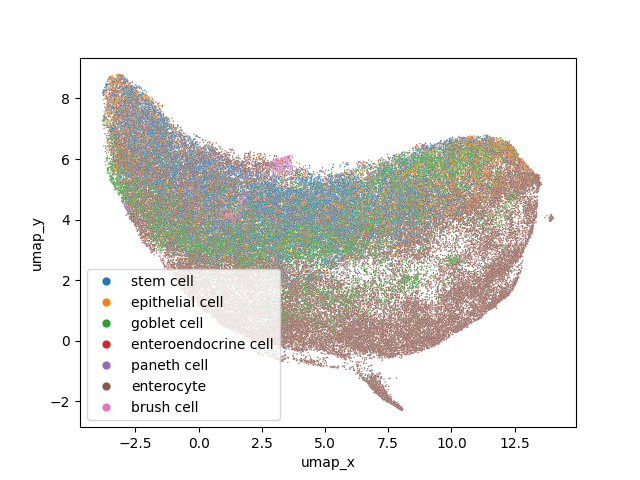

In [45]:
#sanity check: umap of the data
file_path = 'umap_colon_epithel1.png'
if not Path(file_path).exists():
    sns.scatterplot(data = base_df, x="umap_x", y="umap_y", hue="cell_type", s=1)
    plt.legend(fontsize=10, markerscale=6)
    plt.savefig(file_path)
    plt.close()
display(Image(filename=file_path))